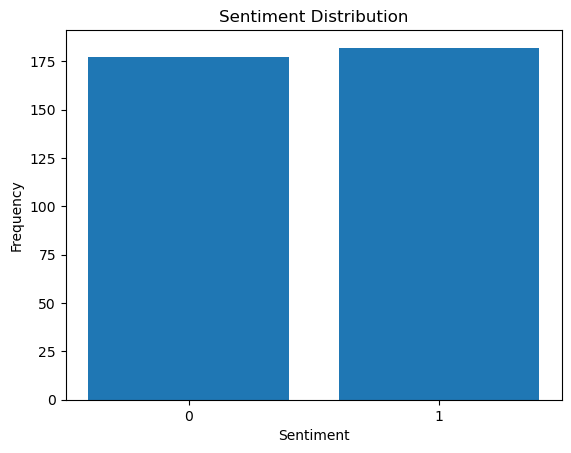

1    182
0    177
Name: Sentiment, dtype: int64
Size of dataset: 359


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("test.csv")
df.dropna(inplace=True)

# plot sentiment distribution
val, count = np.unique(df['Sentiment'], return_counts=True)
plt.bar(val, count)
plt.xticks(np.arange(0, 2, 1))
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()
print(df['Sentiment'].value_counts())


# display size
print('Size of dataset:', df.shape[0])

In [59]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
stop = set(stopwords.words('english'))

def clean(text):
    res = []
    text = text.lower() # to lowercase
    text = re.sub(r"@\S+", "", text) # remove mentions
    text = re.sub("http[s]?\://\S+","",text) # remove links
    text = re.sub(r"[0-9]", "", text) # remove numbers
    text = re.sub(r"[$&+,:;=?@#|'<>.^*()%!-]", "", text) # remove special characters
    # res = word_tokenize(text)
    # res = [word for word in tokens if not word in stop] # remove stopwords
    # return res
    return text

df['clean_text'] = df['Text'].apply(lambda t: clean(t))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [60]:
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Bag of Words
bag_of_words = CountVectorizer()
x = bag_of_words.fit_transform(df['clean_text'])
y = df['Sentiment'].values
X_train, X_test, Y_train, Y_test= train_test_split(x, y)
lr = LogisticRegression()
lr.fit(X_train, Y_train)

predicted = lr.predict(x)
print('Bag of Words\n', classification_report(predicted, y))

# TF-IDF
tf_idf = TfidfVectorizer()
x = tf_idf.fit_transform(df['clean_text'])
y = df['Sentiment'].values
X_train, X_test, Y_train, Y_test= train_test_split(x, y)
lr = LogisticRegression()
lr.fit(X_train, Y_train)

predicted = lr.predict(x)
print('TF-IDF\n', classification_report(predicted, y))

Bag of Words
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       177
           1       0.95      0.95      0.95       182

    accuracy                           0.95       359
   macro avg       0.95      0.95      0.95       359
weighted avg       0.95      0.95      0.95       359

Tfidf
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       160
           1       0.97      0.89      0.93       199

    accuracy                           0.92       359
   macro avg       0.92      0.93      0.92       359
weighted avg       0.93      0.92      0.93       359

